In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


In [4]:
data = pd.read_csv('data/mutagenesisSet_annotated.csv')
#data = data[data.snap2score.isnull() == False]

In [6]:
tp53 = data[data.Protein == 'TP53']

In [13]:
tp53.columns

Index(['Unnamed: 0', 'X', 'Protein', 'uniprot_id', 'mutation', 'id',
       'Activity', 'effect', 'effect2', 'aa1', 'aa2', 'pos', 'SNAP2_class',
       'SNAP2_score', 'id2', 'WT_Mut', 'Variant', 'aa1_polarity',
       'aa2_polarity', 'aa1_PI', 'aa2_PI', 'deltaPI', 'aa1_weight',
       'aa2_weight', 'deltaWeight', 'aa1vol', 'aa2vol', 'deltavolume',
       'Grantham', 'aa1_psic', 'aa2_psic', 'delta_psic', 'accessibility',
       'dssp_sec_str', 'phi_psi_reg', 'delta_solvent_accessibility',
       'b_factor', 'mut_msa_congruency', 'mut_mut_msa_congruency',
       'seq_ind_closest_mut', 'evolutionary_coupling_avg',
       'evolutionary_coupling_prop', 'evolutionary_coupling_avg_norm',
       'selection_coefficient'],
      dtype='object')

In [16]:
tp53['Activity']=pd.to_numeric(tp53['Activity'])

<ipython-input-16-1f2d80039257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp53['Activity']=pd.to_numeric(tp53['Activity'])


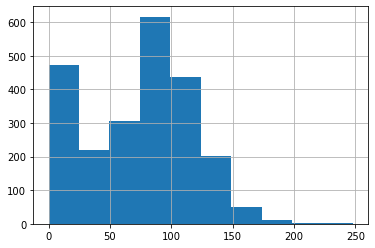

In [17]:
tp53.Activity.hist()

In [18]:
tp53.effect.value_counts()

other       1621
damaging     691
Name: effect, dtype: int64

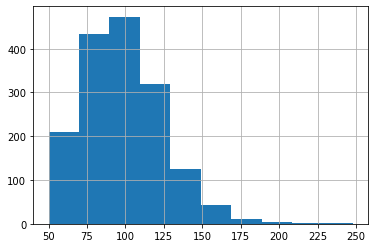

In [19]:
tp53[tp53.effect == 'other'].Activity.hist()

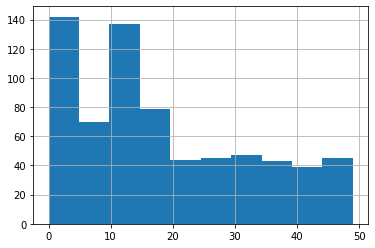

In [20]:
tp53[tp53.effect == 'damaging'].Activity.hist()

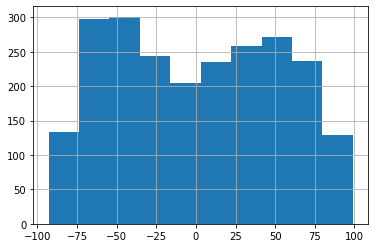

In [21]:
tp53.SNAP2_score.hist()

In [22]:
# SNAP2_score - prediction score
# effect2 - binary effect 

In [24]:
tp53['snap2score_normalized'] = (data.SNAP2_score) + 100 / 200

<ipython-input-24-ab99ea8a9098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp53['snap2score_normalized'] = (data.SNAP2_score) + 100 / 200


In [25]:
tp53['effect_numeric'] = (tp53.effect == 'damaging')

<ipython-input-25-e783358980f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp53['effect_numeric'] = (tp53.effect == 'damaging')


In [26]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(tp53.effect_numeric, tp53.snap2score_normalized)
auc = roc_auc_score(tp53.effect_numeric, tp53.snap2score_normalized)
print('AUC: %.3f' % auc)

AUC: 0.833


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


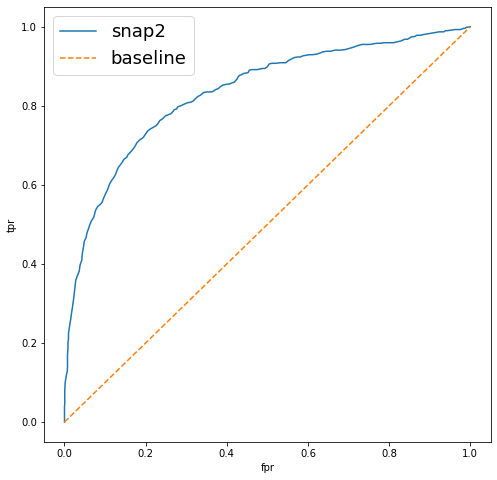

In [27]:
fig = plt.figure(figsize=(8,8))
baseline = np.linspace(0, 1, num=50)
ax = fig.add_subplot(111)
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
ax.plot(fpr, tpr, label='snap2')
ax.plot(baseline, baseline, '--', label='baseline')
plt.legend()
